## Исследование данных о российском кинопрокате



### В данном исследовании будет проанализирован рынок российского кинопроката:

- определение текущих трендов
- отдельно будет проведен анализ фильмов, получивших государственную поддержку. 

### План исследования:

- Предобработка данных: оценка состояния присланных данных, обработка пропусков, дубликатов, неверных типов данных, добавление необходимых столбцов.
- Непосредственно анализ данных: оценка количества выхода фильмов в течение времени, оценка количества сборов в течение времени, оценка фильмов, имеющих определенный возрастной рейтинг в течение времени.
- Анализ фильмов, поддерживаемых государством: оценка каличества фильмов в течение времени, анализ финансируемых фильмов по жанрам, оценка окупаемости финансируемых фильмов, оценка рейтинга фильмов


### Шаг 1. Открытие файлов с данными и объединиение их в один датафрейм. 



In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt

In [4]:
data_mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
data_mkrf_shows

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
...,...,...
3153,224014814,"1,530.00"
3154,224021411,"9,270.00"
3155,224022410,400.00
3156,224023210,360.00


In [5]:
data_mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [6]:
data_mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_mkrf_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [7]:
data_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Обнаружили, что данные в стоолбцах puNumber в обеих таблицах представленны в разных типах данных, поэтому переведем их из типа object во второй таблице в int и заменим строковые значения на NaN. После этого объеденим таблицы.

In [8]:
data_mkrf_movies['puNumber'] = pd.to_numeric(data_mkrf_movies['puNumber'], errors='coerce')

In [9]:
data = data_mkrf_movies.merge(data_mkrf_shows, on='puNumber', how='left')
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,"221,038,416.00",2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,"111,013,816.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,"111,007,013.00",2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,"221,074,614.00",2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,"121,011,416.00",2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,"111,019,114.00",2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Объеденили таблицы mkrf_movies и mkrf_shows в data, по выводу инфо видно, что все элементы таблиц вышли в сводню таблицу.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных

Типы данных не устраивают в столбцах puNumber и show_start_date, retings, в них и преобразуем. 
Заполним NAN в puNumber на 0, очевидно это NAN это отсутствие прокатного удостоверения в данных значениях. 



In [11]:
data['puNumber'] = data['puNumber'].fillna(0)

In [12]:
data['puNumber'] = data['puNumber'].astype('int')

In [13]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')

In [15]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN


#### Шаг 2.2. Изучение пропусков в датафрейме


In [16]:
data.isnull().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [17]:
data['budget']=data['budget'].fillna(0)
data['budget'] = data['budget'].astype('int')

In [18]:
data['refundable_support']=data['refundable_support'].fillna(0)
data['refundable_support'] = data['refundable_support'].astype('int')

In [19]:
data['nonrefundable_support']=data['nonrefundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].astype('int')

In [20]:
data['box_office']=data['box_office'].fillna(0)
data['box_office'] = data['box_office'].astype('int')

Заполнила отсутствующие данные по budget, refundable_support, nonrefundable_support, box_office заглушками для удобства использования, а так же заменила на тип данных int.

- В данных определяются пропуски по значениям типа object в столбцах film_studio, production_country, director, producer, genres, ratings. Эти пропуски оставим как есть, мы не знаем причину пропусков, сообщим о пропусках тем, кто прислал данные. 
- В столбцах financing_sourse, budget nonrefundable_support refundable_support пропущенные данные связаны с отсутствием поддержки.
- Отсутствие данных в столбце box_office может быть связано с тем, что фильм не вышел в прокат? Поэтому их просто заменим на заглушки для удобства. 

 

In [21]:
data.isnull().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source         7154
ratings                   996
genres                    976
box_office                  0
dtype: int64

#### Шаг 2.3. Изучение наличия дубликатов в датафрейме

In [1]:
data.duplicated().sum()

NameError: name 'data' is not defined

In [2]:
duplicate_rows = data[data.duplicated(['title', 'show_start_date'])]
duplicate_rows.count()

NameError: name 'data' is not defined

In [24]:
duplicates_title_pu_number = data[data.duplicated(['title', 'puNumber'])]
duplicates_title_pu_number.count()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Проверены неполные дубликаты по названию фильма и прокатному удостоверению. Дубликатов не обнаружено, фильмы с одинаковым названием, но разными прокатными удостоверениями считаются разными.

#### Шаг 2.4. Исследование категориальных значений

In [25]:
def show_unique(column):
    return data[column].unique()

In [26]:
show_unique('type')

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Обнаружили лишние пробелы в данных, удалим их

In [27]:
data['type']=data['type'].str.strip()

In [28]:
show_unique('type')

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [29]:
show_unique('age_restriction')


array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [30]:
show_unique('title')

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

In [31]:
show_unique('film_studio')

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [32]:
data['film_studio']=data['film_studio'].str.strip()

In [33]:
show_unique('film_studio')

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [34]:
show_unique('director')

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [35]:
show_unique('producer')

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [36]:
show_unique('production_country')

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [37]:
show_unique('financing_source')

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

- Не замечаю, чтобы проблема пробелов была во ВСЕХ категориальных значениях, но мы можем наблюдать ее в в категориях age_restriction, genres, production_country, type.
- Лишние проблелы были удалены из type, film_studio

#### Шаг 2.5. Исследование проблем в  количественных значениях

In [38]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00","7,486.00","7,486.00","7,486.00","6,490.00","7,486.00"
mean,"135,178,527.64","526,182.21","2,172,280.03","5,642,568.25",6.48,"32,262,853.57"
std,"38,382,177.41","5,781,108.09","16,148,935.45","47,528,177.69",1.10,"160,600,784.11"
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,"112,025,043.00",0.00,0.00,0.00,5.90,0.00
50%,"121,015,464.50",0.00,0.00,0.00,6.60,0.00
75%,"124,003,313.75",0.00,0.00,0.00,7.20,"1,080,467.75"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.20,"3,073,568,690.00"


In [39]:
data['budget'].value_counts()

0            7171
38000000        6
50000000        4
80000000        4
38500000        3
             ... 
51196711        1
56693559        1
174381922       1
62000000        1
78096315        1
Name: budget, Length: 290, dtype: int64

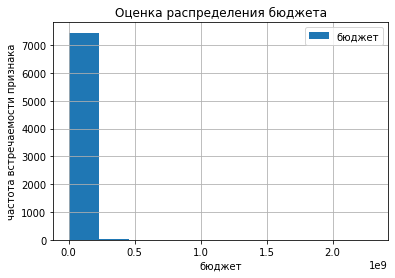

In [40]:
data['budget'].hist(bins=10)
plt.title('Оценка распределения бюджета')
plt.xlabel('бюджет')
plt.ylabel('частота встречаемости признака')
plt.legend(['бюджет'])
plt.show()

Согласно графику, у нас очень много значений, для которых не указан бюджет, отфильтруем эти значения, и посмотрим на график снова.

In [42]:
budget_filtered_data = data.query('budget != 0')
budget_filtered_data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,315.00,315.00,315.00,315.00,298.00,315.00
mean,"111,568,271.31","11,603,174.60","48,107,043.96","134,096,082.35",6.02,"124,889,445.97"
std,"5,844,829.21","25,151,438.82","59,886,140.86","191,226,039.63",1.13,"332,638,242.69"
min,"111,000,115.00",0.00,0.00,"14,462,464.00",1.00,0.00
25%,"111,004,815.50",0.00,"25,000,000.00","46,153,866.50",5.40,"770,654.00"
50%,"111,010,219.00",0.00,"30,000,000.00","73,379,554.00",6.20,"11,011,814.00"
75%,"111,017,167.50","10,000,000.00","40,000,000.00","150,004,286.50",6.70,"96,936,417.50"
max,"214,010,116.00","180,000,000.00","400,000,000.00","2,305,074,303.00",8.50,"3,073,568,690.00"


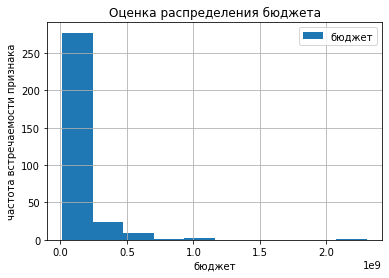

In [43]:
budget_filtered_data['budget'].hist(bins=10)
plt.title('Оценка распределения бюджета')
plt.xlabel('бюджет')
plt.ylabel('частота встречаемости признака')
plt.legend(['бюджет'])
plt.show()


По графику заметно распределение, более менее напоминающее распредление Пуассона, а так же выбросы в виде максимального значения, равного 2,305,074,303.00

In [44]:
data['refundable_support'].value_counts()

0            7375
20000000       12
10000000       10
25000000       10
5000000         9
15000000        9
50000000        8
40000000        8
30000000        7
60000000        6
100000000       5
110000000       2
75000000        2
19000000        2
55000000        2
9000000         1
26000000        1
41000000        1
7153119         1
38000000        1
180000000       1
36000000        1
80000000        1
7346881         1
8000000         1
150000000       1
7000000         1
35000000        1
3500000         1
17000000        1
44000000        1
115000000       1
29000000        1
28000000        1
Name: refundable_support, dtype: int64

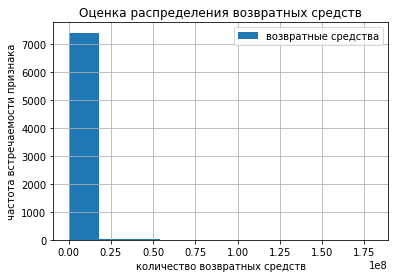

In [45]:
data['refundable_support'].hist(bins=10)
plt.title('Оценка распределения возвратных средств')
plt.xlabel('количество возвратных средств')
plt.ylabel('частота встречаемости признака')
plt.legend(['возвратные средства'])
plt.show()


Отфильтруем данные, чтобы более нагладно оценить распределение.

In [46]:
refundable_support_filtered_data = data.query('refundable_support != 0')
refundable_support_filtered_data['refundable_support'].describe()

count           111.00
mean     35,486,486.49
std      31,972,875.36
min       3,500,000.00
25%      15,000,000.00
50%      25,000,000.00
75%      50,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

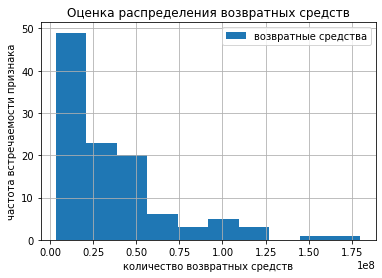

In [47]:
refundable_support_filtered_data['refundable_support'].hist(bins=10)
plt.title('Оценка распределения возвратных средств')
plt.xlabel('количество возвратных средств')
plt.ylabel('частота встречаемости признака')
plt.legend(['возвратные средства'])
plt.show()

По графику заметно распределение, более менее напоминающее распредление Пуассона,а так же единичные выбросы. Среднее и медианное значение практически совпадают.

In [48]:
data['nonrefundable_support'].value_counts()

0            7163
25000000       53
30000000       48
35000000       29
40000000       26
             ... 
64000000        1
225000000       1
8000000         1
51000000        1
30123915        1
Name: nonrefundable_support, Length: 75, dtype: int64

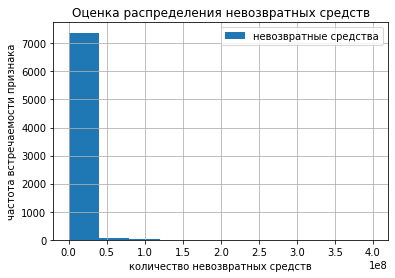

In [49]:
data['nonrefundable_support'].hist(bins=10)
plt.title('Оценка распределения невозвратных средств')
plt.xlabel('количество невозвратных средств')
plt.ylabel('частота встречаемости признака')
plt.legend(['невозвратные средства'])
plt.show()


Отфильтруем данные, чтобы более нагладно оценить распределение.

In [50]:
nonrefundable_support_filtered_data = data.query('nonrefundable_support != 0')
nonrefundable_support_filtered_data['nonrefundable_support'].describe()

count           323.00
mean     50,345,784.25
std      60,243,206.31
min       3,000,000.00
25%      25,000,000.00
50%      30,000,000.00
75%      45,000,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

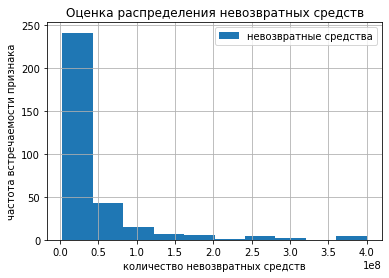

In [51]:
nonrefundable_support_filtered_data['nonrefundable_support'].hist(bins=10)
plt.title('Оценка распределения невозвратных средств')
plt.xlabel('количество невозвратных средств')
plt.ylabel('частота встречаемости признака')
plt.legend(['невозвратные средства'])
plt.show()


Наблюдаем распределение Пуассона, среднее и медианное значение сильно различаются. Отмечается большой выброс 400,000,000.00. 

In [52]:
data['box_office'].value_counts()

0           4352
200           13
300           12
360            9
500            8
            ... 
322284         1
84720          1
1324522        1
12289624       1
4007935        1
Name: box_office, Length: 2938, dtype: int64

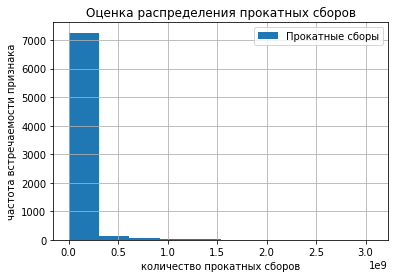

In [53]:
data['box_office'].hist(bins=10)
plt.title('Оценка распределения прокатных сборов')
plt.xlabel('количество прокатных сборов')
plt.ylabel('частота встречаемости признака')
plt.legend(['Прокатные сборы'])
plt.show()


Соответсвенно график будет искажен, за счет большого количества отсутствующих значений. Отфильтруем данные.

In [54]:
box_office_filtered_data = data.query('box_office != 0')
box_office_filtered_data['box_office'].describe()

count           3,134.00
mean       77,064,365.60
std       241,178,383.73
min                40.00
25%           101,028.75
50%         2,409,099.00
75%        24,569,794.75
max     3,073,568,690.00
Name: box_office, dtype: float64

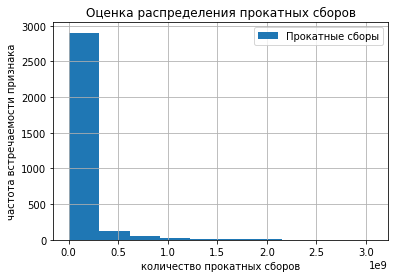

In [55]:
box_office_filtered_data['box_office'].hist(bins=10)
plt.title('Оценка распределения прокатных сборов')
plt.xlabel('количество прокатных сборов')
plt.ylabel('частота встречаемости признака')
plt.legend(['Прокатные сборы'])
plt.show()


График минимально напоминает распределение Пуассона, отмечем резкие выбросы 3,073,568,690.00, за счет чего отмечается резкая разница между средним и медианным значением. 

Из даных о сборах, нам известно, что 4352 фильма не имеют сборов, так что мы можем предположить, что они не вышли в прокат или те, или, возможно, произошла ошибка при внесении данных или их выгрузке. 

In [56]:
filter_data = data.query('budget < refundable_support + nonrefundable_support')
filter_data.head()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.60,драма,446163511
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.80,"боевик,драма,криминал",196572438
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.20,"комедия,фэнтези",67418974
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551


In [57]:
filter_data.count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   16
box_office               17
dtype: int64

Из таблицы видно, что для 17 фтльмов сумма поддержки больше суммы бюджета, так как отсутствует информация о бюджете. Так как нам не известно, по какой причине отсутсвуют данные в колонке бюджет, а так же нам не известно, какой объем бюджета был использован, мы не сможем ничего сделать с этими данными. Оставим отфильтрованную таблицу для дальнейших расчетов. 

- В колонках budget, refundable_support, nonrefundable_support и box_office отмечается большое количество пропущенных данных (которые мы ранее заменили на 0 для удобства). 
- В колонках refundable_support и nonrefundable_support объяснить пропуски можно отсутсвием той или иной поддержки, друигим словами, государство могло дать невозвратную чать без возвратной,  или возвратную без невозвратной.
- Отсутствие значений в колонке box_office можно объяснить двумя причинами, или была допущена ошибка при внесении или выгрузке данных (тк пропущенных значений очень много), либо такие фильмы не вышли в прокат.
- Отсутсвующие данные в колонке бюджет скорее всего связаны с ошибкой, которую могли допустить при внесении или выгрузке данных, особенно это заметно в 17 значениях, для которых указана поддержка государства, но не указан бюджет, включающий ее. Решила оставить эти данные как есть, не удаляя, так как другие столбцы содержат ценную информацию.
- Все данные, при отфильтровке, напоминают распределение Пуассона, но содержат большие выбросы, за счет чего искажается среднее значение. 

#### Шаг 2.6. Добавление новых столбцов





- Добавим столбец с информацией о годе проката. 

In [58]:
data['year'] = data['show_start_date'].dt.year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,NaN,7.20,"боевик,драма,мелодрама",0,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0,0,0,NaN,6.60,"драма,военный",0,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2015


- Добавим новые столбцы с именем и фамилией главного режиссёра и основным жанром фильма. 

In [59]:
def create_column(column):
    try:
        new_column  = column.split(',')[0]
        return new_column
    except AttributeError:
        new_column = 0
        return 0

In [60]:
data['main_genre'] = data['genres'].apply(create_column)

In [61]:
data['main_director'] = data['director'].apply(create_column)

In [62]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,NaN,7.20,"боевик,драма,мелодрама",0,2015,боевик,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0,0,0,NaN,6.60,"драма,военный",0,2016,драма,Е.Матвеев
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2016,фантастика,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2016,фантастика,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2015,фантастика,Тимур Бекмамбетов


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [3]:
group_data = data.query('budget != 0')
group_data

NameError: name 'data' is not defined

In [64]:
data['support_part'] = (((data['nonrefundable_support'] + data['refundable_support']) / data['budget']) *100)
data.query('budget != 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director,support_part
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.10,"драма,мелодрама",365353,2013,драма,А.Атанесян,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,NaN,NaN,28140,2014,0,А.Якимчук,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.30,"комедия,фантастика",19957031,2013,комедия,Р.Давлетьяров,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.20,драма,55917,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.40,драма,232100,2014,драма,М.Угаров,62.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000,400000000,980000000,Фонд кино,6.00,"история,биография,драма",717703185,2019,история,А.Кравчук,51.02
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000,0,190000000,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235,2019,мультфильм,Д.Шмидт,52.63
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000,400000000,944000000,Фонд кино,5.70,"фантастика,боевик",0,2019,фантастика,Ф.Бондарчук,52.97
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0,30000000,46154000,Министерство культуры,5.90,драма,0,2019,драма,И.Северов,65.00


Исследуя датаферйм были обнаружены следующие ошибки:
- В данных определяются пропуски по значениям типа object в столбцах film_studio, production_country, director, producer, genres, ratings. 
- В столбцах financing_sourse, budget nonrefundable_support refundable_support пропущенные данные связаны с отсутствием поддержки.
- Обнаружили лишние пробелы в категориях age_restriction, genres, production_country, type.
- Лишние проблелы были удалены из type, film_studio
- В колонках budget, refundable_support, nonrefundable_support и box_office отмечается большое количество пропущенных данных (которые мы ранее заменили на 0 для удобства). 
- В колонках refundable_support и nonrefundable_support объяснить пропуски можно отсутсвием той или иной поддержки, друигим словами, государство могло дать невозвратную чать без возвратной,  или возвратную без невозвратной.
- Отсутствие значений в колонке box_office можно объяснить двумя причинами, или была допущена ошибка при внесении или выгрузке данных (тк пропущенных значений очень много), либо такие фильмы не вышли в прокат.
- Отсутсвующие данные в колонке бюджет скорее всего связаны с ошибкой, которую могли допустить при внесении или выгрузке данных, особенно это заметно в 17 значениях, для которых указана поддержка государства, но не указан бюджет, включающий ее.
В процессе обработки данных:
- смержили данные из двух таблиц
- заменили в количественных переменных nan на 0 для удобства
- были созданы новые столбцы year, main_genre, main_director, support_part, profit
- не были удалены неявные дубликаты, так как они имели разные прокатные удостоверения, что может быть связано с изменением фильма или правообладателя, что считается разными фильмами.
- заменили тип данных в столбце show_start_date	на datetime


### Шаг 3. Проведение исследовательского анализа данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. 
- Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. 
- Проанализируем, как эта доля менялась по годам. 

Отфильтруем данные, содержащие только фильмы, выходившие в прокат. 

In [65]:
data_showed_film = data.query('puNumber != 0 and box_office != 0')

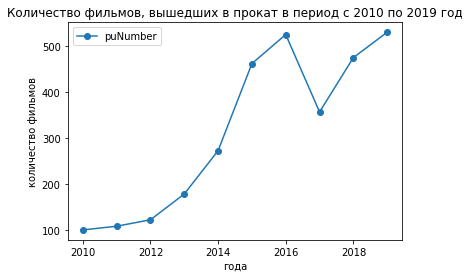

In [66]:
(data_showed_film
    .pivot_table(index='year', values='puNumber', aggfunc='count')
    .plot(style='o-', xlabel='года', ylabel='количество фильмов', title='Количество фильмов, вышедших в прокат в период с 2010 по 2019 год'))
plt.show()




Из графика наблюдаем увеличение количества фильмов, вышедших в прокат с 2010 с пиком в 2016 году, а так же резкий провал в 2017 году. Затем снова наблюдаем период увеличения с 2017 по 2019 года, до того же пика, что и в 2016 году.

Посчитаем, какую долю составляют фильмы, вышедшие в прокат, а так же проанализируем измнение по годам. 

In [67]:
data_not_showed_film = data.query('puNumber != 0 and box_office == 0')
pivot_table_not_showed = data_not_showed_film.pivot_table(index='year', values='puNumber', aggfunc='count')

In [68]:
pivot_table_showed = data_showed_film.pivot_table(index='year', values='puNumber', aggfunc='count')

In [69]:
data_shows_quotient = pivot_table_not_showed.merge(pivot_table_showed, on='year', how='left')
data_shows_quotient.columns=['not_showed', 'showed']
data_shows_quotient['quotient'] = data_shows_quotient['showed'] *100 / (data_shows_quotient['showed'] + data_shows_quotient['not_showed'])
(data_shows_quotient['showed'].sum() / data_shows_quotient['not_showed'].sum())*100

72.02941852447712

In [70]:
data_shows_quotient

,not_showed,showed,quotient
year,,,
2010,884,101,10.25
2011,513,109,17.52
2012,470,123,20.74
2013,451,179,28.41
2014,533,273,33.87
2015,243,462,65.53
2016,293,525,64.18
2017,148,357,70.69
2018,416,475,53.31


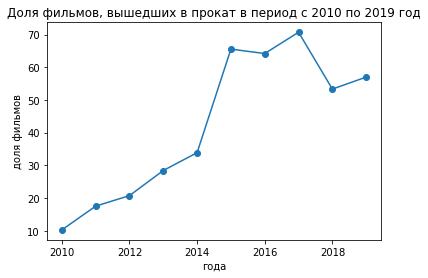

In [71]:
data_shows_quotient['quotient'].plot(style='o-', xlabel='года', ylabel='доля фильмов', title='Доля фильмов, вышедших в прокат в период с 2010 по 2019 год')
plt.show()

72% фильмов вышли впрокат в период с 2010 по 2019 год. Так же мы наблюдаем динамику увеличения доли вышедших фильмов в период с 2010 с первым пиком в 2015 году. Отмечаем спад в 2016 и второй пик в 2017 году, хотя общее количество фильмов как раз снижалось в этот год. А вот 2018 год показвает снижение доли, хоть и количество вышедших фильмов увеличилось. 

- Изучим, как менялась динамика проката по годам. 

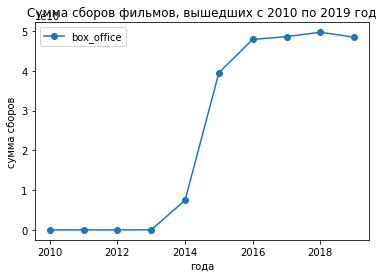

In [72]:
(data_showed_film
    .pivot_table(index='year', values='box_office', aggfunc='sum')
    .plot(style='o-', xlabel='года', ylabel='сумма сборов', title='Сумма сборов фильмов, вышедших с 2010 по 2019 год'))
plt.show()

Сумма сборов была минимальной в 2013 году, максимальной в 2018.

- Посчитаем среднюю и медианную сумму сборов для каждого года.

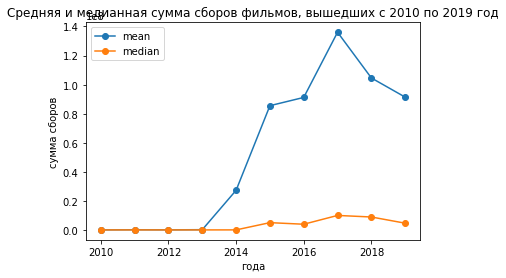

In [73]:
(data_showed_film
    .pivot_table(index='year', values='box_office', aggfunc=('mean','median'))
    .plot(style='o-', xlabel='года', ylabel='сумма сборов', title='Средняя и медианная сумма сборов фильмов, вышедших с 2010 по 2019 год'))
plt.show()

Замечаем резкое различие между средним и медианным значением в сборах. Наиболее вероятно это связано с резкими выбросами по данным о сборах. По медианным значениям видно, что сборы плавно поднимаются в период с 2014 года по 2018.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.
- Исследуем, фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Меняется ли картина в зависимости от года.

Сократим названия возрастных ограничений в столбце age_restriction для удобства чтения

In [74]:
def split_age_restriction(column):
    new_column  = column.split('-')[0].strip()
    return new_column

In [75]:
data['age_restriction'] = data['age_restriction'].apply(split_age_restriction)
data['age_restriction'].unique()

array(['«18+»', '«6+»', '«12+»', '«16+»', '«0+»'], dtype=object)

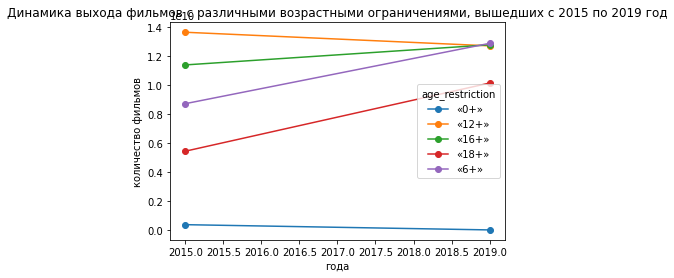

In [76]:
(data
 .query('box_office!= 0 and year in (2015,2019)')
 .pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
 .plot(style='o-', xlabel='года', ylabel='количество фильмов', title='Динамика выхода фильмов с различными возрастными ограничениями, вышедших с 2015 по 2019 год'))
plt.show()
 

- Наибольшее количество денег в прокате собрали фильмы с ограничением 12+ в 2015 году, но к 2019 году количество выручки снижалось и к 2019 году было одинаковым с фильмами с другими ограничениям, кроме рейтинга 0+
- Наблюдается тенденция к повышению сборов у фильмов с ограничениями 6+, 16+ и 18+.
- По данным таблицы, количество вырученных с проката фильмов с ограничением 0+ практически не меняется в период с 2015 по 2019 год.
- Возмозжно, это связано с уменьшением возрастных ограничений? 

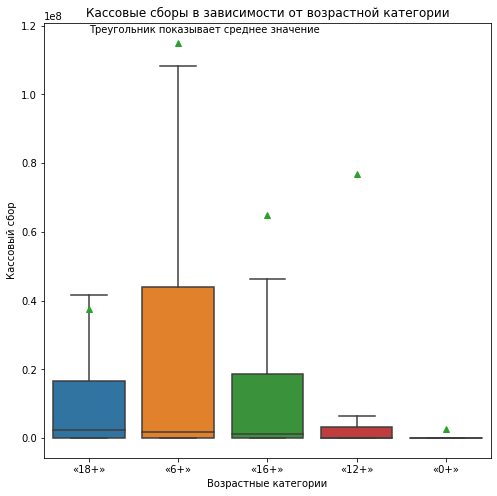

In [77]:
import seaborn as sns
temp = data.copy()
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 1.18e8,'Среднее значение')
plt.show()

- 72% фильмов вышли впрокат в период с 2010 по 2019 год. Так же мы наблюдаем динамику увеличения доли вышедших фильмов в период с 2010 с первым пиком в 2015 году. Отмечаем спад в 2016 и второй пик в 2017 году, хотя общее количество фильмов как раз снижалось в этот год. А вот 2018 год показвает снижение доли, хоть и количество вышедших фильмов увеличилось. 
- Замечаем резкое различие между средним и медианным значением в сборах. Наиболее вероятно это связано с резкими выбросами по данным о сборах. По медианным значениям видно, что сборы плавно поднимаются в период с 2014 года по 2018.
- Наибольшее количество денег в прокате собрали фильмы с ограничением 12+ в 2015 году, но к 2019 году количество выручки снижалось и к 2019 году было одинаковым с фильмами с другими ограничениям, кроме рейтинга 0+
- Наблюдается тенденция к повышению сборов у фильмов с ограничениями 6+, 16+ и 18+.
- По данным таблицы, количество вырученных с проката фильмов с ограничением 0+ практически не меняется в период с 2015 по 2019 год. Предположительно, это связано с уменьшением возрастных огрничений.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Сначала посмотрим на распре деление финансовой поддержи в зависимости от года.

Добавим в таблицу столбец c долей выручки от затраченного бюджета.

In [78]:
data['profit'] = (data['box_office'] / data['budget']) *100
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director,support_part,profit
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»,0,0,0,NaN,7.20,"боевик,драма,мелодрама",0,2015,боевик,Кевин Костнер,NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+»,0,0,0,NaN,6.60,"драма,военный",0,2016,драма,Е.Матвеев,NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2016,фантастика,Тимур Бекмамбетов,NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2016,фантастика,Тимур Бекмамбетов,NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,0,0,0,NaN,6.80,"фантастика,боевик,триллер",0,2015,фантастика,Тимур Бекмамбетов,NaN,NaN


In [79]:
filtered_support_data = data.query('budget >= refundable_support + nonrefundable_support != 0 ')
filtered_support_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director,support_part,profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0,26500000,79411900,Министерство культуры,8.10,"драма,мелодрама",365353,2013,драма,А.Атанесян,33.37,0.46
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0,26000000,37142857,Министерство культуры,NaN,NaN,28140,2014,0,А.Якимчук,70.00,0.08
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0,107847945,176023490,Фонд кино,5.30,"комедия,фантастика",19957031,2013,комедия,Р.Давлетьяров,61.27,11.34
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0,28000000,40574140,Министерство культуры,4.20,драма,55917,2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),69.01,0.14
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0,25000000,40015122,Министерство культуры,6.40,драма,232100,2014,драма,М.Угаров,62.48,0.58


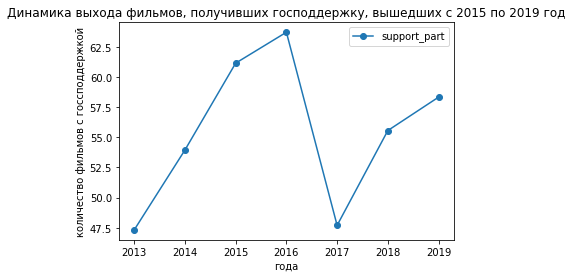

In [80]:
(filtered_support_data
 .pivot_table(index='year',  values='support_part', aggfunc='median')
 .plot(style='o-', xlabel='года', ylabel='количество фильмов с госсподдержкой', title='Динамика выхода фильмов, получивших господдержку, вышедших с 2015 по 2019 год'))
plt.show()

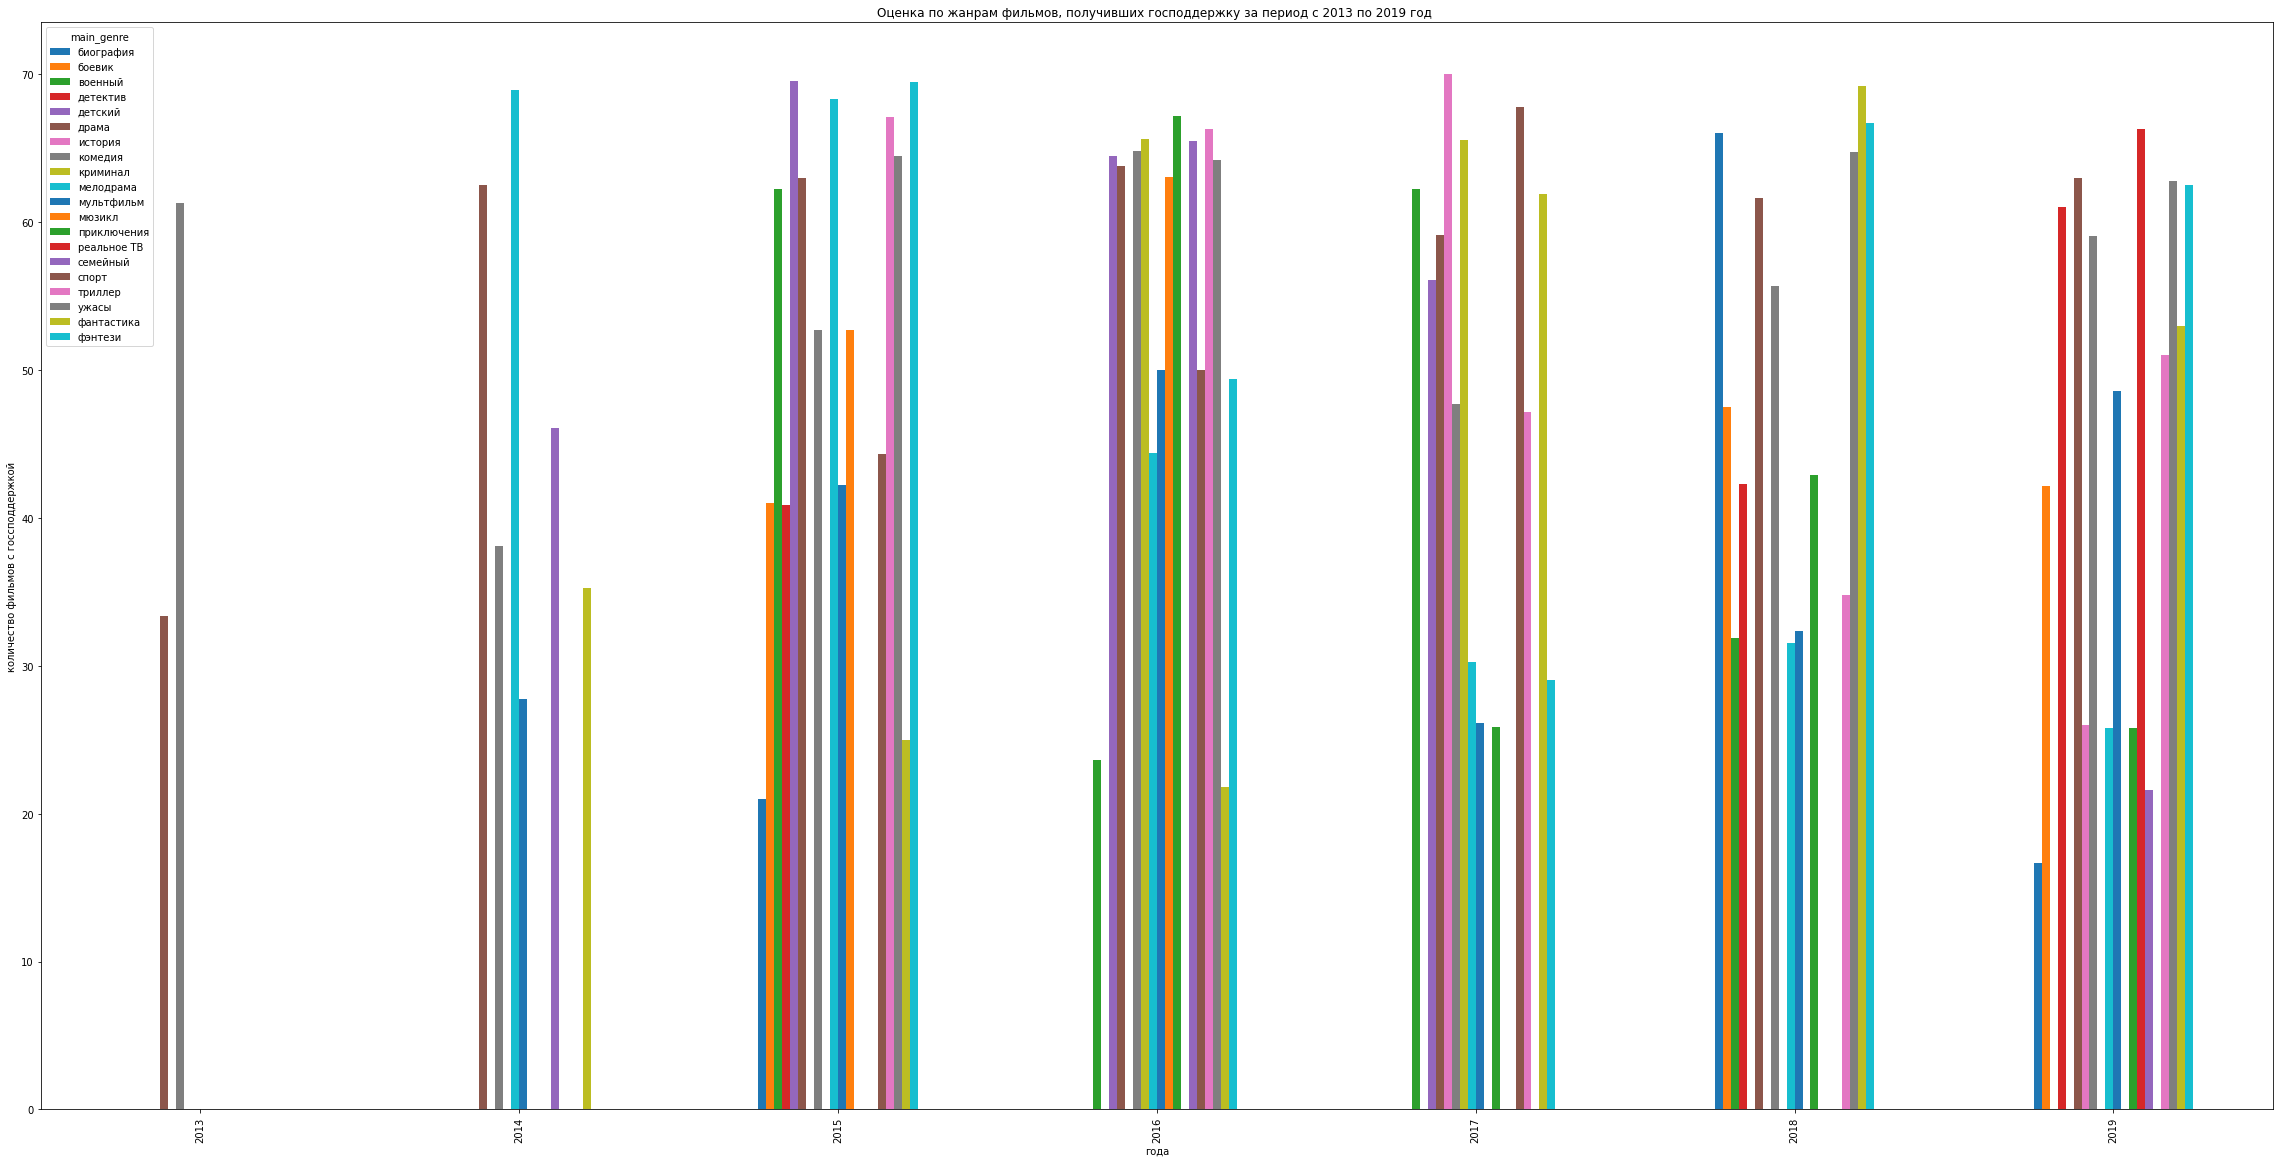

In [81]:
(filtered_support_data
 .query('main_genre != 0')
 .pivot_table(index='year', columns='main_genre', values='support_part', aggfunc='median')
 .plot.bar(figsize=(40,20), xlabel='года', ylabel='количество фильмов с госсподдержкой', title='Оценка по жанрам фильмов, получивших господдержку за период с 2013 по 2019 год '))
plt.show()


- Согласно графику, доля поддержки увеличивалась с 2013 по 2016 год, затем наступал спад до 2017 года, и затем снова подъем к 2018 году. 
- Увеличение объема финансирования кино с 2013 по 2016 можно объяснить связью с политическими событиями в эти годы, поэтому финансирование российского кино было частью программы по подъему патриотического духа? 
- Стабильно наблюдаем наибольшее финансирование в жанрах "драма", "детский", "фентези" и "семейный". В 2016-2017 годах получают большую поддержку в жанре "история", в 2017 поддержка жанра "военный"


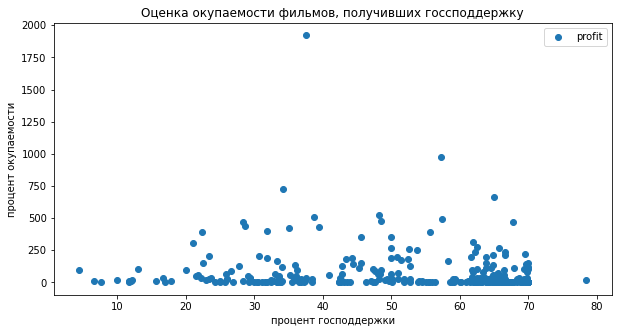

In [82]:
(filtered_support_data
.query('box_office!= 0')
.plot(x='support_part', y='profit',style='o',figsize=(10,5),xlabel='процент господдержки', ylabel='процент окупаемости', title='Оценка окупаемости фильмов, получивших госсподдержку' ))
plt.show()

Согласно графику, большая часть фильмов, финансируемых государством не окупается, так как большинство значений находится на уровне менее 100% выручки. 

Попробуем посчитать корреляцию в зависимости от объема финансирования и окупаемости.

In [83]:
clear_data= (data.query('budget and box_office!= 0'))
clear_data['support_part'].corr(clear_data['profit'])

-0.17093493451994596

Согласно предоставленным данным, определяется крайне слабая связь между долей финансирования и долей дохода.

Определим рейтинг фильмов, которые финансируются государством.


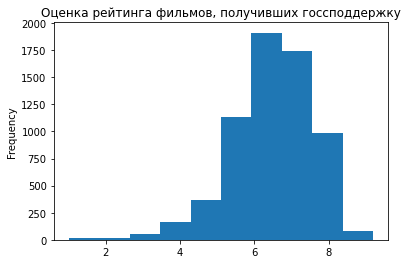

In [84]:
sup_part_data = data.query('support_part != 0')
sup_part_data['ratings'].plot(kind='hist', xlabel='рейтинг', ylabel='количество фильмов', title='Оценка рейтинга фильмов, получивших госсподдержку')
plt.show()

Наибольшее количество фильмов с государственной поддержкой имеет рейтинг 6-7. 

- Доля государственной поддержки увеличивалась с 2013 по 2016 год, затем наступал спад до 2017 года, и затем снова подъем к 2018 году. Увеличение объема финансирования кино с 2013 по 2016 можно объяснить связью с политическими событиями в эти годы, поэтому финансирование российского кино было частью программы по подъему патриотического духа?
- Наблюдается наибольшее финансирование в жанрах "драма", "детский", "фентези" и "семейный". В 2016-2017 годах получают большую поддержку в жанре "история", в 2017 поддержка жанра "военный
- Большая часть фильмов, финансируемых государством не окупается, так как большинство значений находится на уровне менее 100% выручки. Определяется крайне слабая связь между долей финансирования и долей дохода.
- Наибольшее количество фильмов с государственной поддержкой имеет рейтинг 6-7. 

### Шаг 5. Общий вывод

#### Исследуя датаферйм были обнаружены следующие ошибки:
- В данных определяются пропуски по значениям типа object в столбцах film_studio, production_country, director, producer, genres, ratings.
- В столбцах financing_sourse, budget nonrefundable_support refundable_support пропущенные данные связаны с отсутствием поддержки.
- Обнаружили лишние пробелы в категориях age_restriction, genres, production_country, type.
- Лишние проблелы были удалены из type, film_studio
- В колонках budget, refundable_support, nonrefundable_support и box_office отмечается большое количество пропущенных данных (которые мы ранее заменили на 0 для удобства).
- В колонках refundable_support и nonrefundable_support объяснить пропуски можно отсутсвием той или иной поддержки, друигим словами, государство могло дать невозвратную чать без возвратной, или возвратную без невозвратной.
- Отсутствие значений в колонке box_office можно объяснить двумя причинами, или была допущена ошибка при внесении или выгрузке данных (тк пропущенных значений очень много), либо такие фильмы не вышли в прокат.
- Отсутсвующие данные в колонке бюджет скорее всего связаны с ошибкой, которую могли допустить при внесении или выгрузке данных, особенно это заметно в 17 значениях, для которых указана поддержка государства, но не указан бюджет, включающий ее.
#### В процессе обработки данных:
- Cмержили данные из двух таблиц
- Pаменили в количественных переменных nan на 0 для удобства
- Были созданы новые столбцы year, main_genre, main_director, support_part, profit
- Не были удалены неявные дубликаты, так как они имели разные прокатные удостоверения, что может быть связано с изменением фильма или правообладателя, что считается разными фильмами.
- заменили тип данных в столбце show_start_date на datetime
#### При анализе данных:
- 72% фильмов вышли впрокат в период с 2010 по 2019 год. Так же мы наблюдаем динамику увеличения доли вышедших фильмов в период с 2010 с первым пиком в 2015 году. Отмечаем спад в 2016 и второй пик в 2017 году, хотя общее количество фильмов как раз снижалось в этот год. А вот 2018 год показвает снижение доли, хоть и количество вышедших фильмов увеличилось. 
- Замечаем резкое различие между средним и медианным значением в сборах. Наиболее вероятно это связано с резкими выбросами по данным о сборах. По медианным значениям видно, что сборы плавно поднимаются в период с 2014 года по 2018.
- Наибольшее количество денег в прокате собрали фильмы с ограничением 12+ в 2015 году, но к 2019 году количество выручки снижалось и к 2019 году было одинаковым с фильмами с другими ограничениям, кроме рейтинга 0+
- Наблюдается тенденция к повышению сборов у фильмов с ограничениями 6+, 16+ и 18+.
- По данным таблицы, количество вырученных с проката фильмов с ограничением 0+ практически не меняется в период с 2015 по 2019 год. Предположительно, это связано с уменьшением возрастных огрничений.
#### При анализе данных фильмов с финансовой поддержкой государства:
- Доля государственной поддержки увеличивалась с 2013 по 2016 год, затем наступал спад до 2017 года, и затем снова подъем к 2018 году. Увеличение объема финансирования кино с 2013 по 2016 можно объяснить связью с политическими событиями в эти годы, поэтому финансирование российского кино было частью программы по подъему патриотического духа?
- Наблюдается наибольшее финансирование в жанрах "драма", "детский", "фентези" и "семейный". В 2016-2017 годах получают большую поддержку в жанре "история", в 2017 поддержка жанра "военный
- Большая часть фильмов, финансируемых государством не окупается, так как большинство значений находится на уровне менее 100% выручки. Определяется крайне слабая связь между долей финансирования и долей дохода.
- Наибольшее количество фильмов с государственной поддержкой имеет рейтинг 6-7.

